<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Going_Modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
device

'cpu'

In [4]:
from pathlib import Path
import zipfile

data = Path('data')
image_path = data/'piza_stake_sushi'

if image_path.is_dir():
  print('the image directory exists')
else:
  image_path.mkdir(parents = True, exist_ok = True)

In [5]:
import requests
with open(data/'pizza_steak_sushi.zip', 'wb') as f:
  req = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(req.content)


In [6]:
import zipfile
with zipfile.ZipFile(data/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping the files')
  zip_ref.extractall(image_path)

unzipping the files


# **Becoming one with the data**

In [7]:
import os
os.walk(image_path)

<generator object _walk at 0x7f6cb8989620>

In [8]:
def oswalk(dirpath):

  for dirpath, dirnames, filepath in os.walk(dirpath):
    print(f'the dirpath is {dirpath} file path is {len(filepath)} dir name is {len(dirnames)}')

In [9]:
oswalk(image_path)

the dirpath is data/piza_stake_sushi file path is 0 dir name is 2
the dirpath is data/piza_stake_sushi/test file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/test/sushi file path is 31 dir name is 0
the dirpath is data/piza_stake_sushi/test/steak file path is 19 dir name is 0
the dirpath is data/piza_stake_sushi/test/pizza file path is 25 dir name is 0
the dirpath is data/piza_stake_sushi/train file path is 0 dir name is 3
the dirpath is data/piza_stake_sushi/train/sushi file path is 72 dir name is 0
the dirpath is data/piza_stake_sushi/train/steak file path is 75 dir name is 0
the dirpath is data/piza_stake_sushi/train/pizza file path is 78 dir name is 0


In [10]:
image_path

PosixPath('data/piza_stake_sushi')

In [11]:
train_dir = image_path / 'train'
test_dir = image_path/'test'

# **Visualizing the image**

In [12]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))


In [13]:
random_image = random.choice(image_path_list)
random_image

PosixPath('data/piza_stake_sushi/test/pizza/344397.jpg')

In [14]:
class_of_random = random_image.parent.stem

Random image path is data/piza_stake_sushi/test/pizza/344397.jpg
image class is pizza
image height : 342
image width : 512


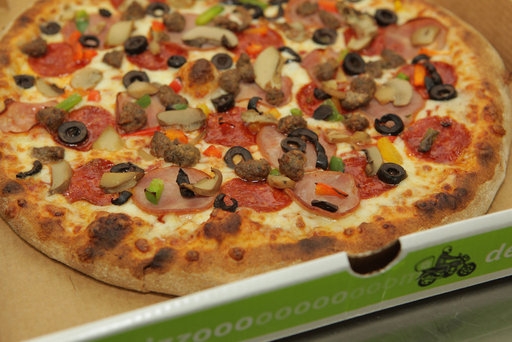

In [15]:
img = Image.open(random_image)
print(f'Random image path is {random_image}')
print(f'image class is {class_of_random}')
print(f'image height : {img.height}')
print(f'image width : {img.width}')
img

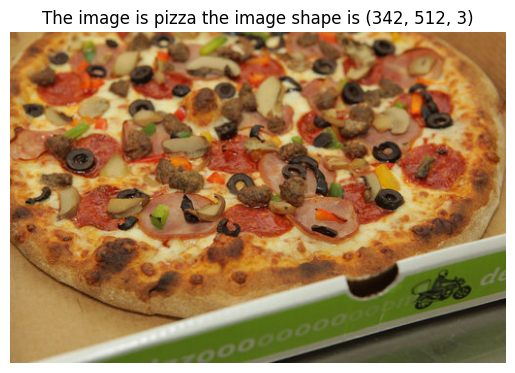

In [16]:
import matplotlib.pyplot as plt
import numpy as np

image_np = np.asarray(img)

plt.imshow(img);
plt.title(f'The image is {class_of_random} the image shape is {image_np.shape}');
plt.axis(False);

In [17]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

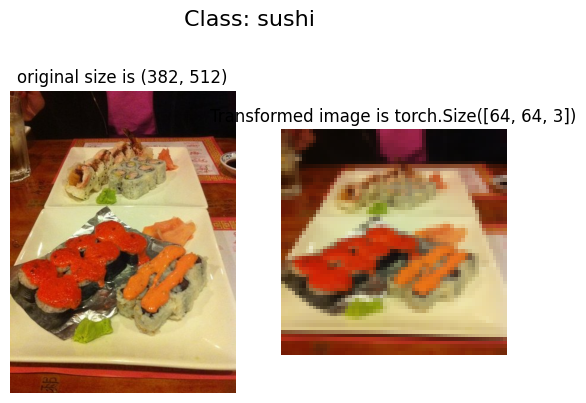

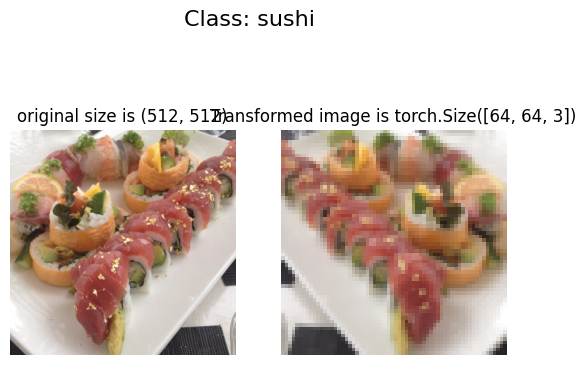

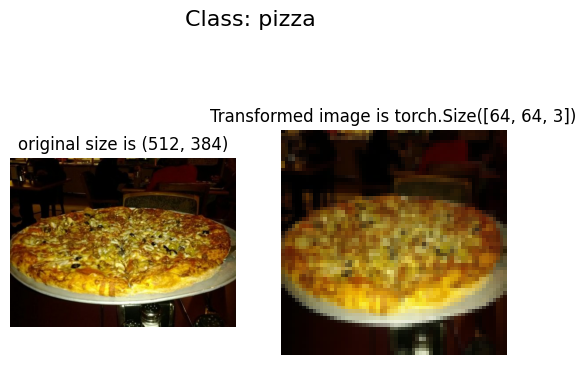

In [18]:
def plot_transformed_images(image_paths, transform, n =3, seed = 43):
  """ This function will plot the images before and after transforming side by side"""

  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f'original size is {f.size}')
      ax[0].axis('off');

      #Transform and plot image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed image is {transformed_image.shape}')
      ax[1].axis('off');

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize = 16)


plot_transformed_images(image_path_list, data_transform, 3)








In [19]:
os.remove('/content/data/pizza_steak_sushi.zip')

# **Creating a Modular Code for reusing it later**

In [20]:
import os
os.mkdir('going_modular')

In [21]:
%%writefile going_modular/data_setup.py

"""
Contains functionality for creating Pytorch DataLoader for
image classification data.
"""

import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int = NUM_WORKERS):
  """ Creating training and testing dataloaders.
  Takes training and testing paths as inputs and
  loads them into trainable dataloders and outputs
  training and testing dataloders.

  Args:
    train_dir: Path to training directory
    test_dir: Path to tesing directory
    transform: The transformation to be applied on the image
    batch_size: Number of batchs per sample
    num_workers: Number of workers used from CPU

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    where class_names is a list of target classes.

    Example usage:
      train_dataloader, test_dataloader , class_name = /
      = create_dataloders(
        train_dir = path/to/train_dir,
        test_dir = path/to/test_dir,
        transform = some_transform,
        batch_size = 32,
        num_workers = 4
      )
  """

  # Use Image Folder to create datasets

  train_dataset = datasets.ImageFolder(train_dir, transform=transform)
  test_dataset = datasets.ImageFolder(test_dir, transform=transform)


  # Get Class Names
  class_names = train_dataset.classes

  train_dataloader = DataLoader(
      train_dataset,
      batch_size = batch_size,
      shuffle = True,
      num_workers = num_workers,
      pin_memory = True
  )

  test_dataloader = DataLoader(
      test_dataset,
      batch_size = batch_size,
      shuffle = False,
      num_workers = num_workers,
      pin_memory = True
  )

  return train_dataloader, test_dataloader, class_names


Writing going_modular/data_setup.py


In [22]:
from going_modular import data_setup

In [23]:
data_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [24]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir, test_dir, data_transform, 32, num_workers=os.cpu_count())

In [25]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir, test_dir, data_transform, 32)

In [26]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f6c1d0e44c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6c1d0e5e40>)

torch.Size([64, 64, 3])
torch.float32
<class 'torch.Tensor'>
tensor(1)


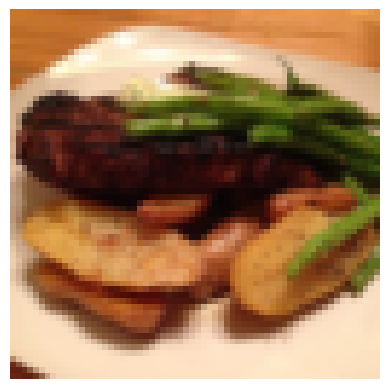

In [27]:
images, labels = next(iter(train_dataloader))
trans_img = images[0].permute(1,2,0)
plt.imshow(trans_img)
plt.axis(False)
print(trans_img.shape)
print(trans_img.dtype)
print(type(labels[0]))
print(labels[0])


# **Creating a modeule for making a model**

In [28]:
%%writefile going_modular/model_building.py

"""
Contins PyTorch model code to instantiate a Tiny VGG Model
"""
import torch
from torch import nn

class TinyVGG(nn.Module):
  """
  Creaing a tiny vgg architecture.

  Args:
    input_shape: The input shape of the image (grey, color,etc)
    hidden_layer: The number of hidden neurons in the model
    output_layer: The number of output units

  """

  def __init__(self, input_shape, hidden_layer,output_shape):
    super().__init__()

    self.block1 = nn.Sequential(
        nn.Conv2d(3,hidden_layer,kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU()
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_layer, hidden_layer,kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride =2)
    )

    self.block3 = nn.Sequential(
        nn.Conv2d(hidden_layer,hidden_layer, kernel_size = 3, stride = 1,padding = 0),
        nn.ReLU()
    )

    self.block4 = nn.Sequential(
        nn.Conv2d(hidden_layer,hidden_layer, kernel_size = 3, stride = 1, padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_layer * 13 * 13, 32),  # 2890 instead of 289
        nn.ReLU(),
        nn.Linear(32, output_shape),
        nn.Softmax(dim=1),
    )


  def forward(self,x):

    x = self.block1(x)
    # print(f'the first layer output is {x.shape}')
    x = self.block2(x)
    # print(f'the secodn is {x.shape}')
    x = self.block3(x)
    # print(f'the thirs is {x.shape}')
    x = self.block4(x)
    # print(f'the foruth is {x.shape}')
    x = self.classifier(x)
    return x

Writing going_modular/model_building.py


In [29]:
from going_modular import model_building

model1 = model_building.TinyVGG(3,10,len(class_names))

In [30]:
model1

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=3, bias=True)
    (4): Softmax(dim=1)
  )
)

In [31]:
model1.eval()
with torch.inference_mode():
  logits = model1(images[0].unsqueeze(dim = 0))
  print(logits)
  pred = torch.argmax(logits,dim = 1)
  print(pred)
  output = class_names[pred]
  print(output)

tensor([[0.3412, 0.2963, 0.3625]])
tensor([2])
sushi


# **Creating a module for training and testing the code**

In [32]:
%%writefile going_modular/engine.py

import torch
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score as accuracy
from typing import List, Tuple, Dict

def train_model(model: torch.nn.Module,
                data: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer) -> Tuple[float,float]:
  """
  This function will train the model.
  Args:
    model : Input the model you want to train
    data: Input the training dataset
    loss_fn: Input the loss function you want to use
    optimizer: Input the optimizer you want to use

  Returns:
    train_loss: Train loss per every epoch
    train_accuracy: Train accuracy for every epoch

  """

  model.train()
  total_loss = 0
  train_acc = 0
  for train_data, train_labels in data:
    y_logits = model(train_data)
    train_loss = loss_fn(y_logits, train_labels)
    total_loss += train_loss.item()
    y_preds = y_logits.argmax(dim = 1)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_acc += accuracy(train_labels, y_preds)
  train_acc = train_acc / (len(data))


  return total_loss/len(data), train_acc


def test_model(model: torch.nn.Module,
               data: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module) -> Tuple[float, float]:

  """
  This function will test the model.
  Args:
    model : Input the model you want to test
    data: Input the testing dataset
    loss_fn: Input the loss function you want to use


  Returns:
    train_loss: Test loss per every epoch
    train_accuracy: Test accuracy for every epoch

  """
  model.eval()
  total_loss = 0
  test_acc = 0
  with torch.inference_mode():
    for test_data, test_labels in data:
      y_logits = model(test_data)
      test_loss = loss_fn(y_logits, test_labels)
      total_loss += test_loss.item()
      test_preds = y_logits.argmax(dim = 1)
      batch_acc = accuracy(test_labels, test_preds)
      test_acc += batch_acc
  return total_loss/len(data), test_acc/len(data)



def train(model:torch.nn.Module,
          epochs: int,
          train_data: torch.utils.data.DataLoader,
          test_data: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer) ->Dict[str,List]:

  """
  This function will train the model for given number of epochs.

  Args:
    model: The model you want to train
    epochs: Number of epochs you want to train
    train_data: The data used for training
    test_data: The data you want to test on
    loss_fn: The loss function to use
    optimizer: The optimizer to use

  Output:
    result: The dictionary that returns the training and testinge metrics for every epoch

  """
  result = {}
  training_accuracies = []
  testing_accuracies = []
  training_losses = []
  testing_losses = []
  for epoch in tqdm(range(epochs)):
    train_loss, train_accuracy = train_model(model,train_data, loss_fn, optimizer)
    test_loss, test_accuracy = test_model(model, test_data, loss_fn)
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)
    training_losses.append(train_loss)
    testing_losses.append(test_loss)
    print(f'epoch:{epoch} -> trainloss:{train_loss} -> train_acc: {train_accuracy} -> test_acc:{test_accuracy}-> test_loss:{test_loss}')
  result['train_accuracies'] = training_accuracies
  result['test_accuracies'] = testing_accuracies
  result['testing_losses'] = testing_losses
  result['training_losses'] = training_losses
  return result




Writing going_modular/engine.py


In [33]:
from going_modular import engine

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model1.parameters(), lr = 0.001)

In [35]:
engine.train(model1,epochs = 5, train_data =train_dataloader, test_data= train_dataloader,loss_fn = loss_fn, optimizer = optimizer )

  0%|          | 0/5 [00:00<?, ?it/s]

epoch:0 -> trainloss:1.0972931683063507 -> train_acc: 0.38671875 -> test_acc:0.3046875-> test_loss:1.1017426699399948
epoch:1 -> trainloss:1.1000120490789413 -> train_acc: 0.3046875 -> test_acc:0.3046875-> test_loss:1.0984177738428116
epoch:2 -> trainloss:1.0922245383262634 -> train_acc: 0.42578125 -> test_acc:0.42578125-> test_loss:1.0902360677719116
epoch:3 -> trainloss:1.0840560346841812 -> train_acc: 0.42578125 -> test_acc:0.45703125-> test_loss:1.079283982515335
epoch:4 -> trainloss:1.0832038223743439 -> train_acc: 0.3359375 -> test_acc:0.57421875-> test_loss:1.0651683807373047


{'train_accuracies': [0.38671875,
  0.3046875,
  0.42578125,
  0.42578125,
  0.3359375],
 'test_accuracies': [0.3046875, 0.3046875, 0.42578125, 0.45703125, 0.57421875],
 'testing_losses': [1.1017426699399948,
  1.0984177738428116,
  1.0902360677719116,
  1.079283982515335,
  1.0651683807373047],
 'training_losses': [1.0972931683063507,
  1.1000120490789413,
  1.0922245383262634,
  1.0840560346841812,
  1.0832038223743439]}

# **Save the model Modular Code**

In [36]:
model1

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=3, bias=True)
    (4): Softmax(dim=1)
  )
)

In [37]:
%%writefile going_modular/utils.py


from pathlib import Path
import torch
def save_model(model:torch.nn.Module,
               model_name: str,
               target_dir: str):

  """
  This function will save the models

  Args:
    model: The model you want to save
    model_name: The name you want to give
    target_dir: The location you want to save

  Returns:
    None
  """

  target_path = Path(target_dir)
  target_path.mkdir(parents = True, exist_ok = True)

  assert model_name.endswith('.pt') or model_name.endswith('.pth'), "The models name is wrong"

  save_path = target_path/model_name

  print(f'[INFO] Saving model to {save_path}')
  torch.save(model.state_dict(), save_path)



Writing going_modular/utils.py


In [38]:
from going_modular import utils

In [39]:
utils.save_model(model1,
                 'basice.pth',
                 'saved_model')

[INFO] Saving model to saved_model/basice.pth
